1.	Load the "boston house prices" dataset from the boston_house_prices.csv file using the pd.read_csv function (you don't need index_column here). You can find a description of this dataset in the boston_house_prices.txt file.
This is a regression dataset with "MEDV" the median house value in a block in thousand dollars the target. How many features are there and how many samples?
Split the data into a training and a test set for learning. Optionally you can plot MEDV vs any of the features using the plot method of the dataframe (using kind="scatter").


In [18]:
import pandas as pd
#import numpy as np
import matplotlib.pyplot as plt

In [19]:
#load the data from file to the dataframe
data = pd.read_csv("boston_house_prices.csv")
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [20]:
#number of samples, and number of features
data.shape

(506, 14)

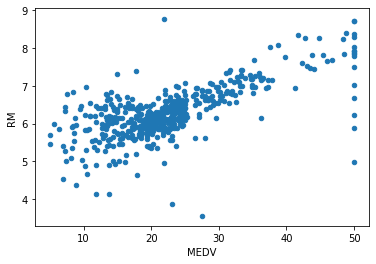

In [21]:
#optional: plot MEDV vs RM using the plot method of the dataframe (using kind="scatter").
data.plot(x='MEDV', y='RM', kind='scatter')

In [22]:
X = data.drop("MEDV", axis=1) #Whether to drop labels from the index (0 or ‘index’) or columns (1 or ‘columns’)
y = data.MEDV

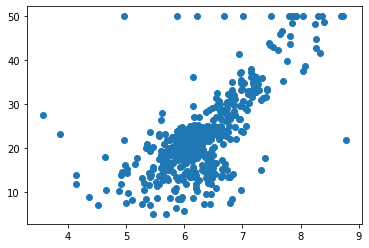

In [23]:
plt.scatter(X.RM,y)

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y) #default is 25-75 split

2.	Load the iris dataset from the sklearn.datasets module using the load_iris function.
Split it into training and test set using train_test_split. Then train and evaluate the following models on the iris dataset:

sklearn.neighbors.KNeighborsClassifier sklearn.linear_model.LogisticRegression 

 How do these perform on the training set vs the test set? Which one is the best on the training set, which one is the best on the test set?


In [25]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

#data = load_iris()
#df = pd.DataFrame(data['data'], columns=data['feature_names'])
#df['target'] = data['target']
#df.head()
iris = load_iris()
X, y = iris.data, iris.target

print("Dataset size: %d  number of features: %d  number of classes: %d"
      % (X.shape[0], X.shape[1], len(np.unique(y))))

X_train, X_test, y_train, y_test = train_test_split(X, y)

Dataset size: 150  number of features: 4  number of classes: 3


In [26]:
# Training KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

print("test set score of knn: %f" % knn.score(X_test, y_test))

test set score of knn: 1.000000


In [27]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='lbfgs', multi_class='auto',max_iter=1000)
logreg.fit(X_train, y_train)
print("Score on Logistic Regression: ", logreg.score(X_test, y_test))

Score on Logistic Regression:  0.9736842105263158


3. Load the dataset bike_day_raw.csv, which has the regression target cnt. This dataset is hourly bike rentals in the citybike platform. The cnt column is the number of rentals, which we want to predict from date and weather data.

Split the data into a training and a test set using train_test_split. 

Use the LinearRegression class to learn a regression model on this data. 
You can evaluate with the score method, which provides the R^2or using the mean_squared_error function from sklearn.metrics (Challenge: You can also write it yourself in numpy).


In [28]:
data = pd.read_csv("bike_day_raw.csv")
X = data.drop("cnt", axis=1)
y = data.cnt

display(data.head())

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,985
1,1,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,801
2,1,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,1349
3,1,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,1562
4,1,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,1600


In [29]:
from sklearn.linear_model import LinearRegression
import numpy

lr = LinearRegression().fit(X_train, y_train)

print(lr.score(X_train, y_train))
ybar = numpy.sum(y_train)/len(y_train)          # or sum(y)/len(y)
ssreg = numpy.sum((lr.predict(X_train)-ybar)**2)   # or sum([ (yihat - ybar)**2 for yihat in yhat])
sstot = numpy.sum((y_train - ybar)**2)    # or sum([ (yi - ybar)**2 for yi in y])
print(ssreg / sstot)

print(lr.score(X_test, y_test))


0.5328925529498699
0.4991033756876271


4.	Load the diabetes dataset using sklearn.datasets.load_diabetes. Apply LinearRegression, Ridge and Lasso and visualize the coefficients. Try polynomial features.

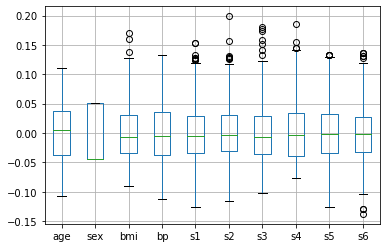

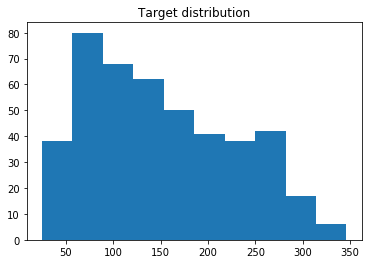

In [30]:
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()

# create dataframe for easy boxplot
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df.boxplot()

plt.figure()
plt.title("Target distribution")
plt.hist(diabetes.target, bins="auto")

X_train, X_test, y_train, y_test = train_test_split(diabetes.data,
                                                    diabetes.target)
